In [1]:
import numpy as np, sys, os, holoviews as hv, scipy
sys.path.insert(0, '../') # add normal modules
from Utils import IO, plotting as plotz

root = '../Data/new4'
data = IO.DataLoader(root)

settings = {k: IO.Settings(os.path.join(root, k)) for k in data}

import multiprocessing as mp
from multiprocessing.pool import ThreadPool
processes = mp.cpu_count()

aucs = loadedData = {}
for k, v in data.items():
    tmp = os.path.join(root, k)
    setting = settings[k]
    
    tmp_worker = IO.Worker(v, settings[k])
    with ThreadPool(processes = processes) as p:
        p.map(tmp_worker, tmp_worker.idx)
        v = np.frombuffer(tmp_worker.buff, dtype = np.float64).reshape(*tmp_worker.buffshape)    
    del tmp_worker
    s = v.shape
    v = v.reshape(-1, setting.nNodes, setting.deltas // 2 - 1)
    v = np.array([(i - i.min()) / (i.max() - i.min()) for i in v])
    v = v.reshape(-1, s[-1])
    loadedData[k] = v.reshape(s)
    
    




  0%|          | 0/41 [00:00<?, ?it/s]

Extracting data...
Done
Reading settings in ../Data/new4/2019-06-03T11:05:32.960142: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:11:30.992457: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:16:49.912813: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:22:49.080641: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:27:16.483542: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:32:25.304709: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:37:02.429791: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:41:25.948390: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:45:24.173282: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:47:22.351567: using json
loading graph
Reading settings in ../Data/new4/2019-06-03T11:50:09.148055: using json
loading graph
Reading settings in ../Data/ne

100%|██████████| 41/41 [00:02<00:00, 20.48it/s]


In [2]:
# a = next(iter(data))
# data[a]['0.8']['1']

In [3]:
def worker(sample):
    # tmp workaround
    if len(sample.shape) == 1:
        sample = sample.reshape(-1, 1)
    auc = np.zeros((len(sample), 2))
    coeffs, errors = plotz.fit(sample, func, params = fitParam)
    for nodei, c in enumerate(coeffs):
        tmp = 0
        F      = lambda x: func(x, *c) - c[0]
        tmp, _ = scipy.integrate.quad(F, 0, LIMIT)
        auc[nodei, 0] = tmp
        auc[nodei, 1] = errors[nodei]
    auc[auc < np.finfo(auc.dtype).eps ] = 0
    return auc[:, 0]
from tqdm import tqdm

double = lambda x, a, b, c, d, e, f: a + b * np.exp(-c*(x)) + d * np.exp(- e * (x-f))

double_= lambda x, b, c, d, e, f: b * np.exp(-c*(x)) + d * np.exp(- e * (x - f ))
single = lambda x, a, b, c : a + b * np.exp(-c * x)
single_= lambda x, a, b, c : a + b * np.exp(-c * x)
special= lambda x, a, b, c, d: a  + b * np.exp(- (x)**c - d)

func        = double
p0          = np.ones((func.__code__.co_argcount - 1)); # p0[0] = 0
fitParam    = dict(maxfev = int(1e6), \
                   bounds = (0, np.inf), p0 = p0,\
                   jac = 'cs')
aucs = {}
for k, v in tqdm(loadedData.items()):
    setting = settings[k]
    LIMIT = setting.deltas // 2 - 1
    LIMIT = np.inf
    s = v.shape
    v = v.reshape(-1, *s[-2:])
    try:
        with mp.Pool(mp.cpu_count()) as p:
            auc = np.asarray(p.map(worker, v)).reshape(s[:-1])
        aucs[k] = auc
    except:
        continue

 36%|███▋      | 8/22 [00:02<00:04,  2.92it/s]/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 22/22 [00:08<00:00,  2.69it/s]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
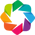

ValueError: could not broadcast input array from shape (3,1,1,20,49) into shape (3,1,1)

In [4]:
hv.extension('bokeh')


p = []
pp= []
for k, v in aucs.items():
    v = v.squeeze()[[0, 1]].max(-1)
    p.append(v)
    pp.append(loadedData[k])
p  = np.array(p)
pp = np.array(pp)

sampled = hv.NdOverlay({idx: hv.NdMapping([hv.Curve(j) for j in i.squeeze()[0]]) for idx, (_, i) in enumerate(loadedData.items()) })

def update(index):
    if not index:
        return sampled[0].relabel('No selection')
    print(index)
    return sampled[index[0]].relabel('Selected')

scatter = hv.Scatter(p)
stream  = hv.streams.Selection1D(source = scatter)
dm      = hv.DynamicMap(update, streams = [stream])

layout  = scatter + dm
layout.opts(hv.opts.Scatter(size = 12, tools = ['tap', 'hover', 'lasso_select']))



In [ ]:
sampled[[0,3]]

/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/casper/miniconda3/lib/python3.7/site-packages/networ

22

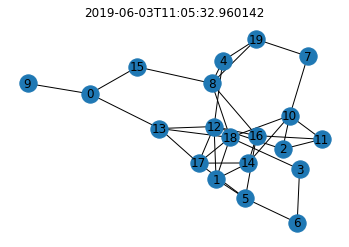

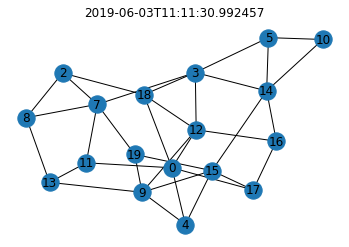

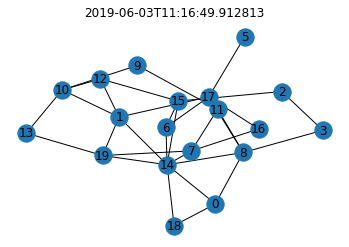

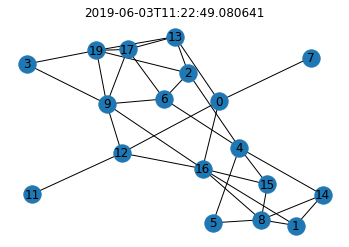

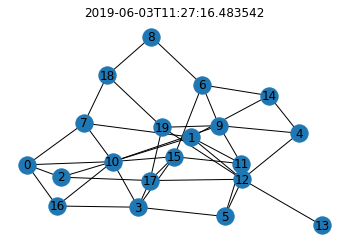

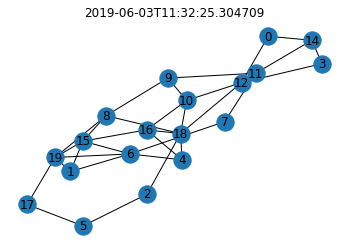

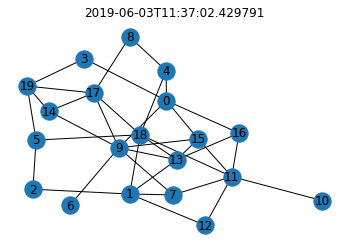

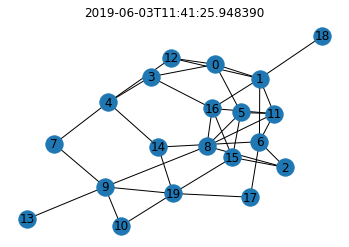

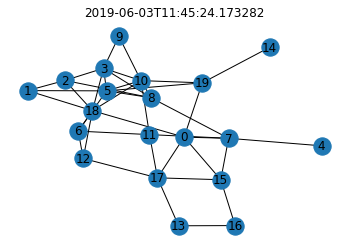

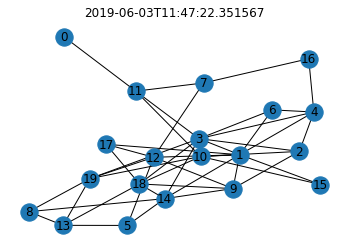

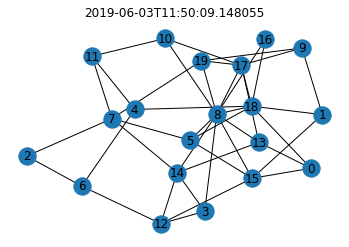

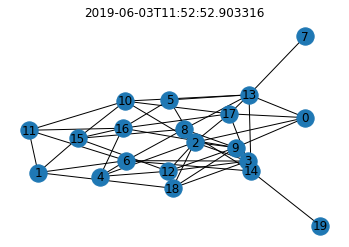

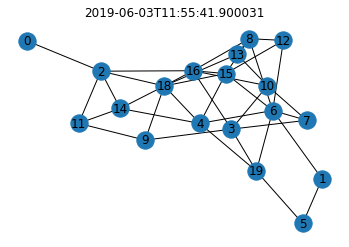

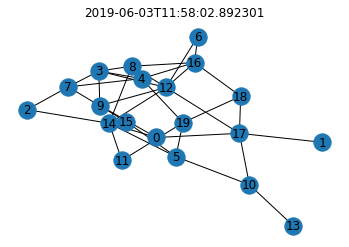

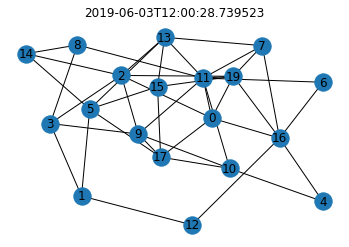

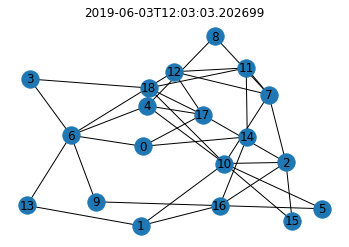

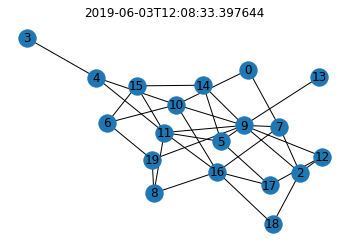

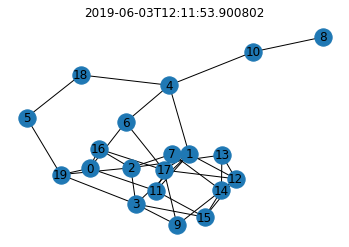

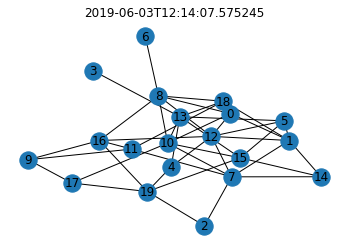

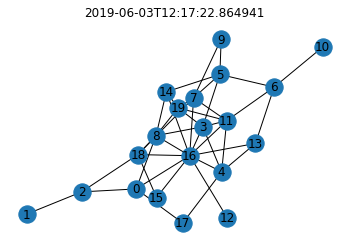

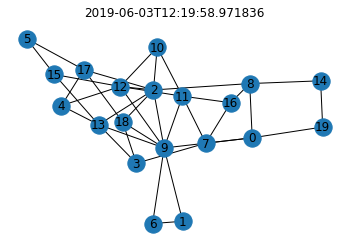

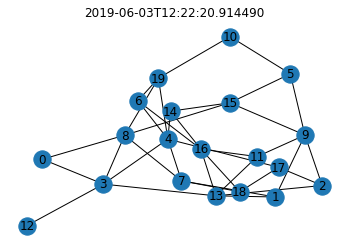

In [5]:
import matplotlib.pyplot as plt

# data['2019-05-23T15:55:19.025053']
# tmp_set = '2019-05-23T15:55:19.025053'
# tmp = loadedData[tmp_set][[0, 1]].squeeze()
# fig, ax = plt.subplots(1,2 )
# ax[0].plot(tmp[0].T)
# ax[1].plot(tmp[1].T, '--')

# print(aucs[tmp_set].max(-1))
# # ax.set_ylim(0, .25)
# fig.show()
import networkx as nx

for name, setting in settings.items():
    fig, ax = plt.subplots()
    g = nx.node_link_graph(setting.graph)
    degs = dict(g.degree())
#     ax.hist(degs.values(), bins = 10)
    nx.draw(g, ax = ax, with_labels = 1)
    ax.set_title(name)
    fig.show()
len(aucs)

/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


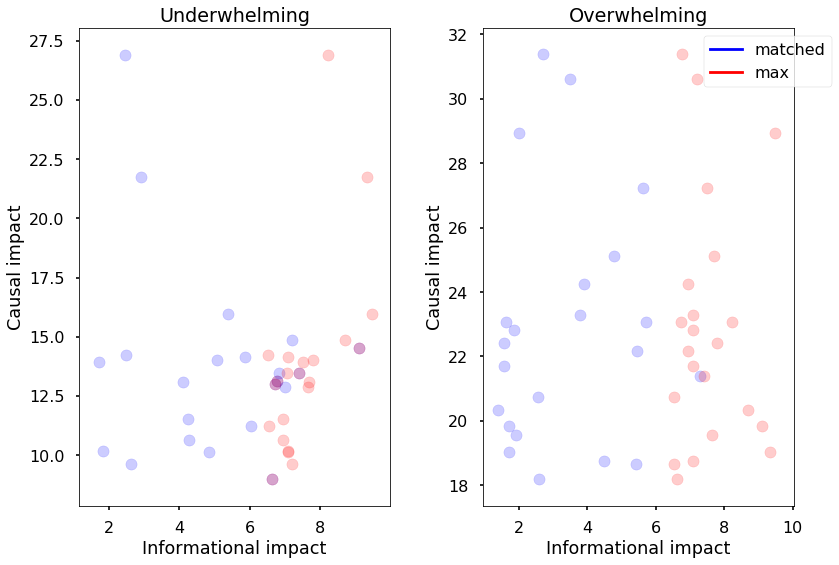

In [6]:
from matplotlib import style
style.reload_library()
%matplotlib inline
style.use('seaborn-poster')
fig, ax = plt.subplots(1,2)
labels = 'Underwhelming Overwhelming'.split()
for k, v in aucs.items():
    tmp = v.squeeze()
    jdx = np.argsort(tmp, axis = -1)[:, -1]
#     print([tmp[i, j] for i, j in enumerate(jdx)])
    for idx, axi in enumerate(ax):
        y = tmp[[0, idx + 1]]
        axi.scatter(*y[:, jdx[idx + 1]], color = 'blue', alpha = .2)
        axi.scatter(*tmp[[0, idx + 1]].max(-1), color = 'red', alpha = .2)
        axi.set_title(labels[idx])
        axi.set(xlabel = 'Informational impact', ylabel = 'Causal impact')
fig.subplots_adjust(wspace = .3)

axi.legend(handles = [plt.Line2D([0], [0], color = i, label = j) for i, j in zip(\
                    'blue red'.split(), 'matched max'.split())], bbox_to_anchor = (1.15, 1))
fig.show()

[[ 9  0]
 [ 5 15]
 [ 8 18]]
[[ 3  2]
 [12  3]
 [16 13]]
[[10  7]
 [ 0 10]
 [ 9 17]]
[[18  8]
 [13  3]
 [10  0]]
[[13  5]
 [16  7]
 [ 8 17]]


/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.i

[[10  2]
 [10  0]
 [18 11]]
[[ 7  9]
 [13  3]
 [ 9 19]]
[[16 13]
 [16  6]
 [ 8 18]]
[[16  0]
 [ 6 16]
 [18  8]]
[[ 2  6]
 [16 11]
 [ 8 18]]
[[ 1  5]
 [ 7 11]
 [ 8 17]]
[[ 1 13]
 [13  3]
 [12  2]]
[[ 1 12]
 [ 2  8]
 [18 11]]


/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.i

[[12  2]
 [12  0]
 [15  5]]
[[18 10]
 [10  0]
 [17  7]]
[[ 6  3]
 [17  7]
 [12  2]]
[[ 2  1]
 [10  0]
 [16  6]]
[[10 12]
 [12  2]
 [13  3]]
[0.18181818 0.        ] [0.38569461 0.        ]


/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/casper/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.i

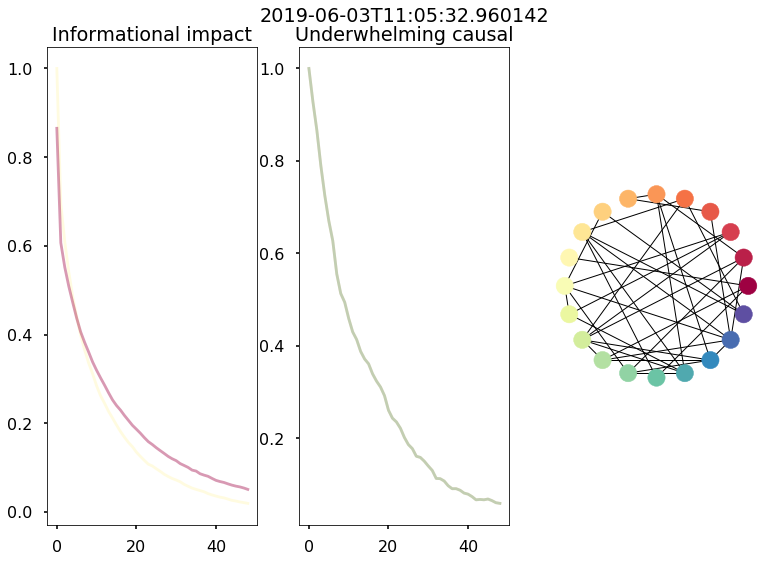

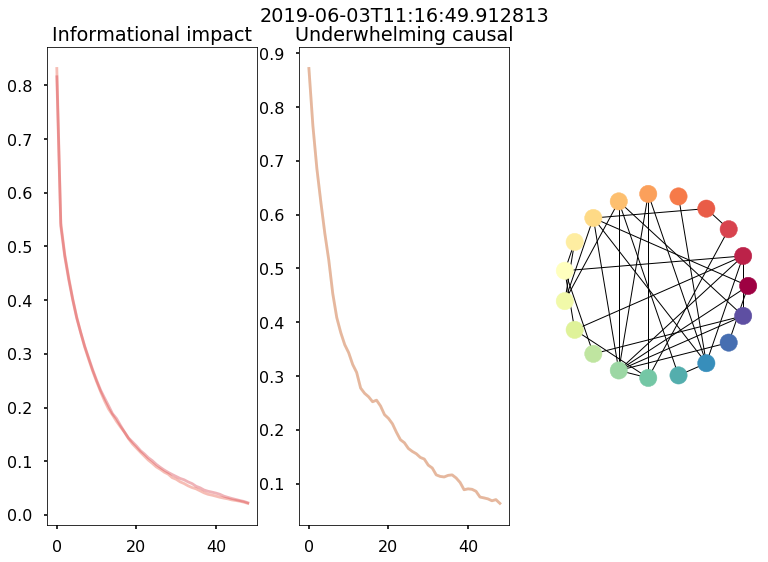

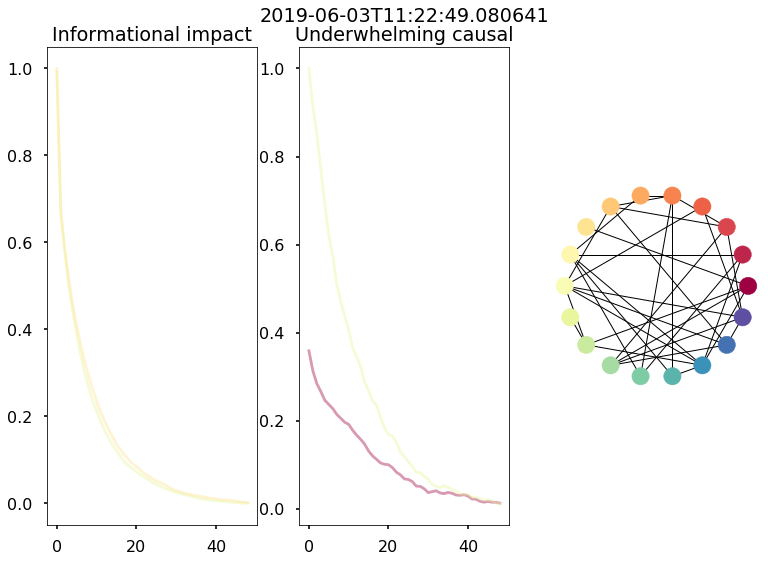

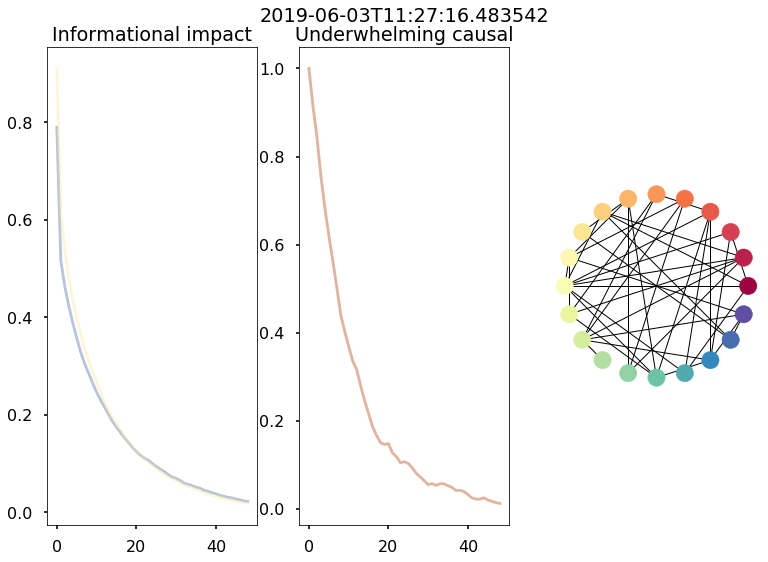

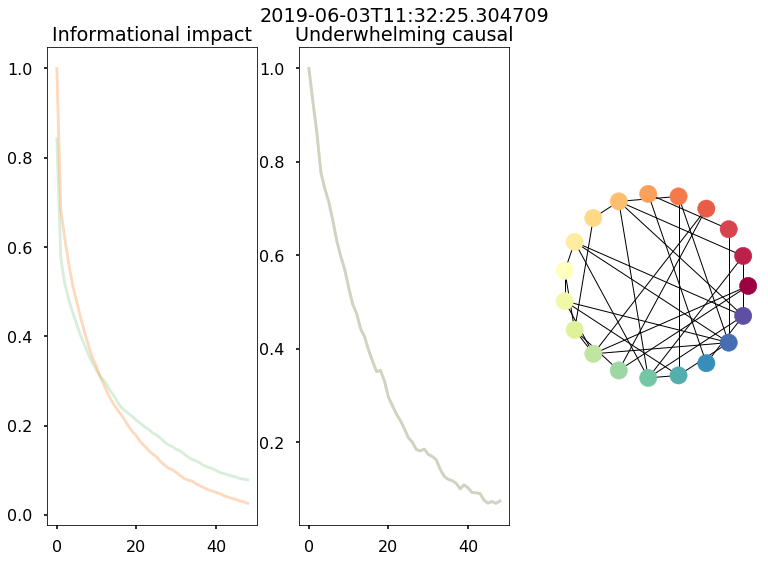

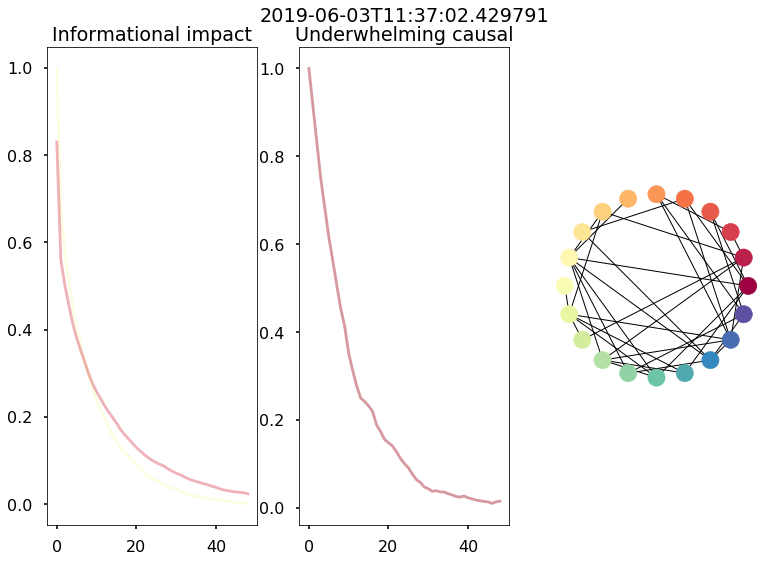

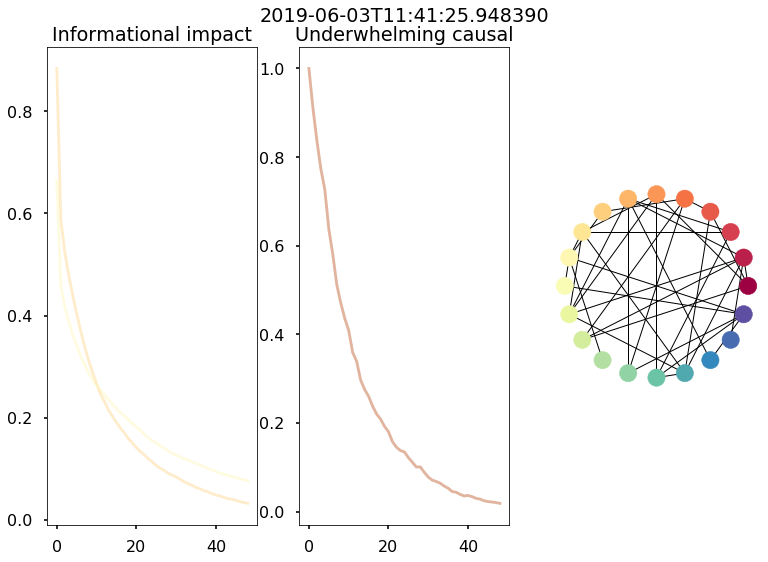

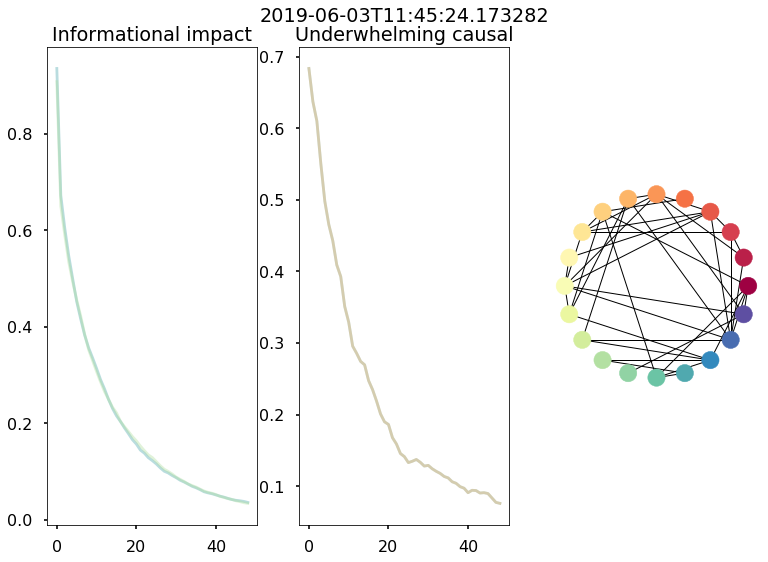

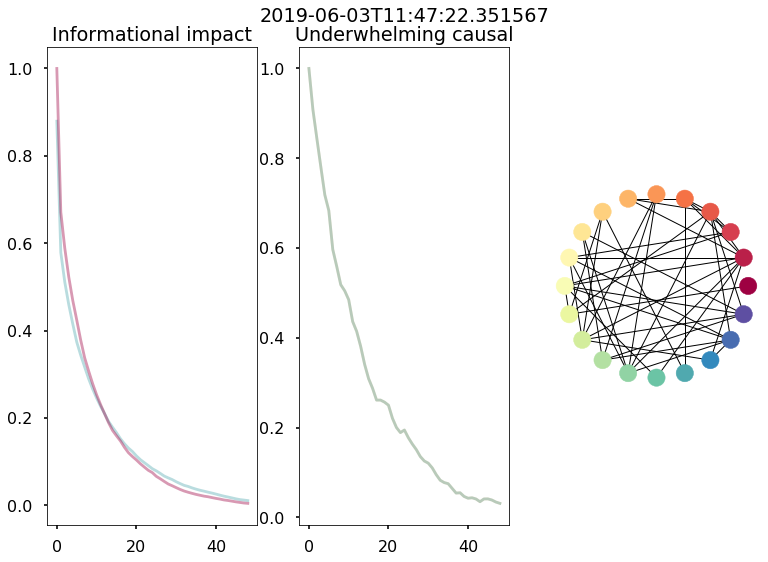

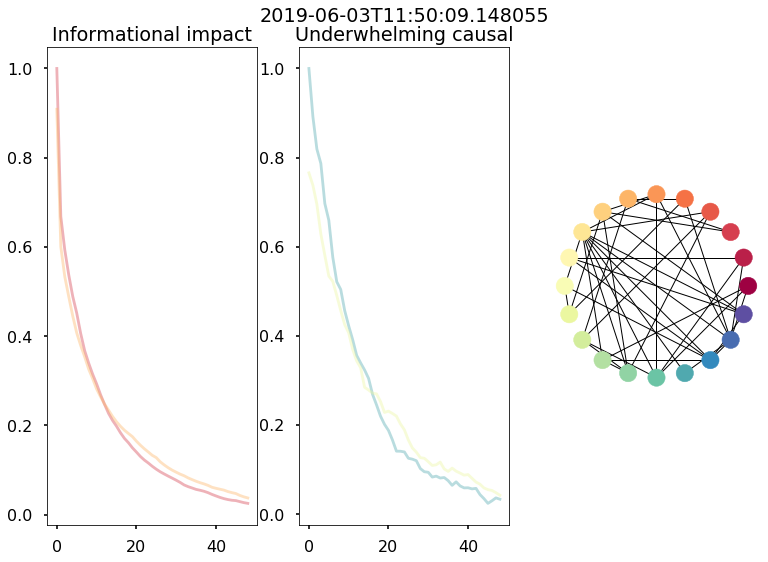

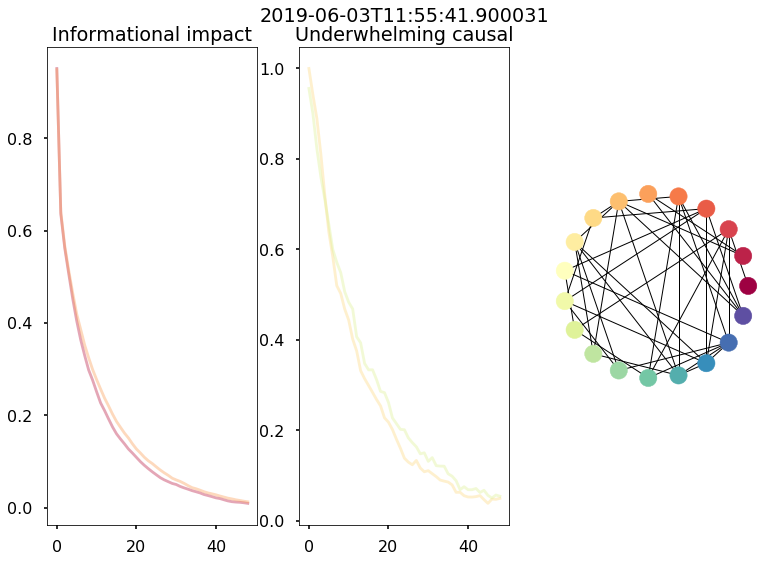

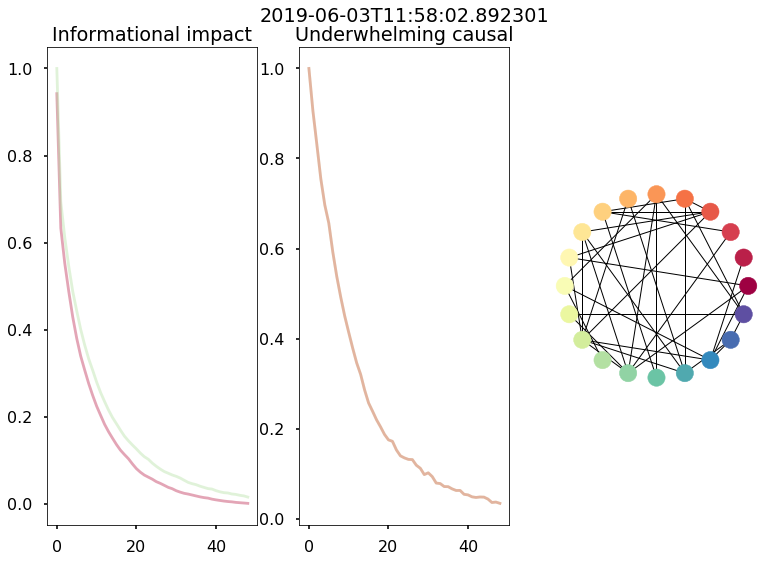

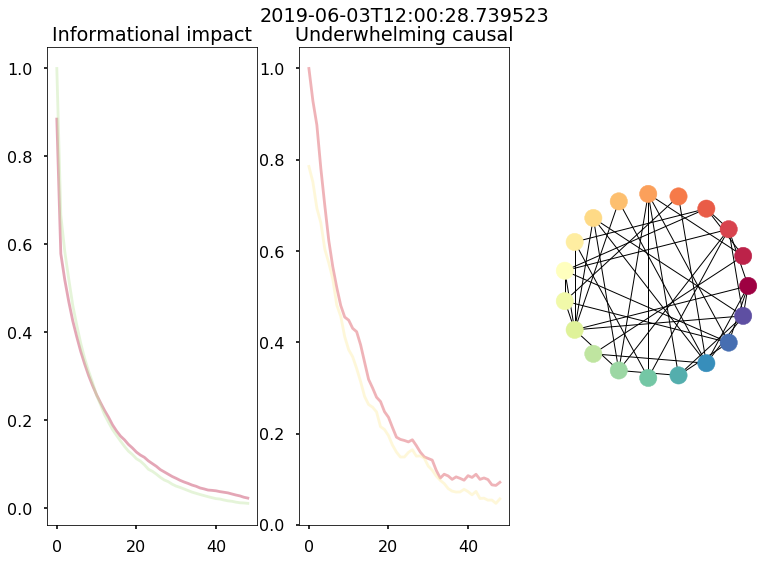

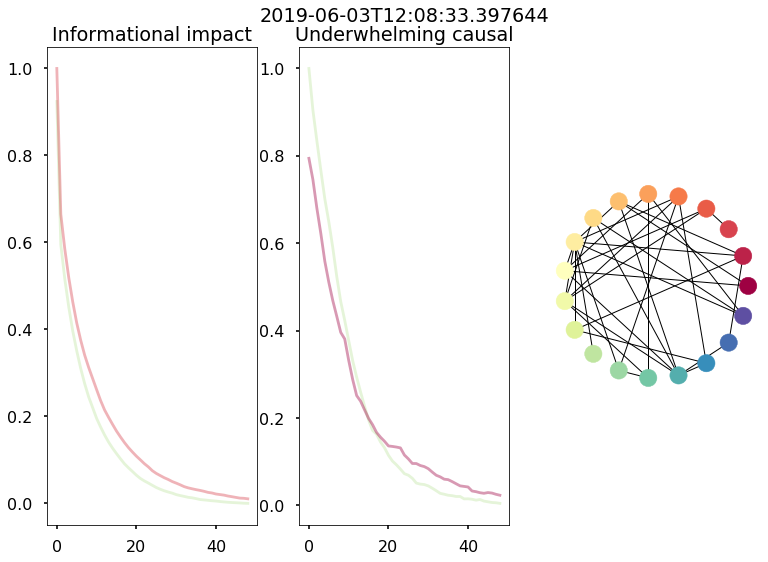

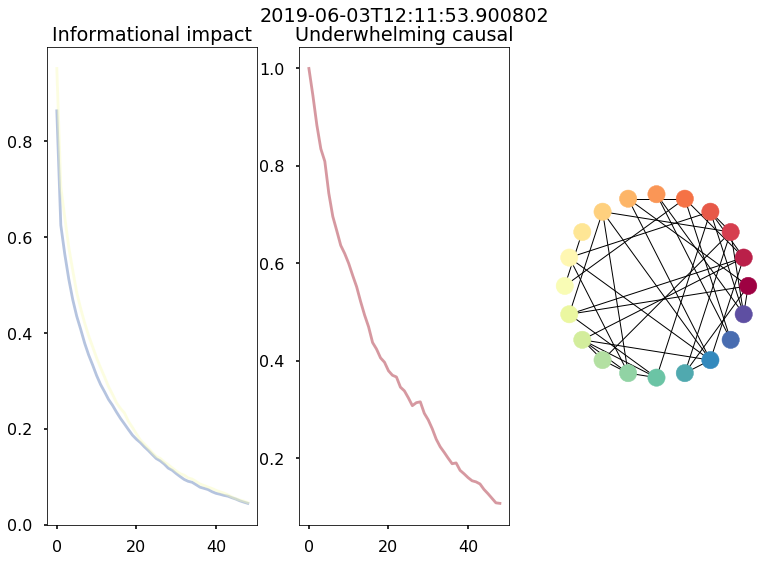

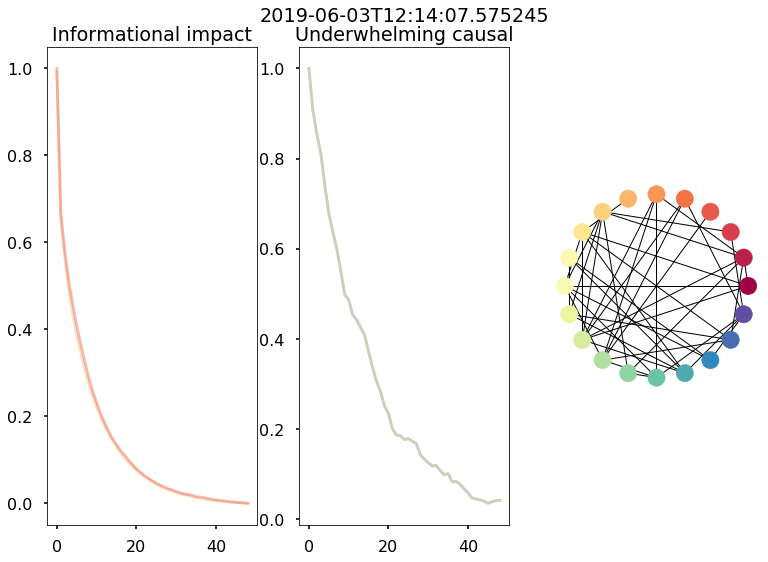

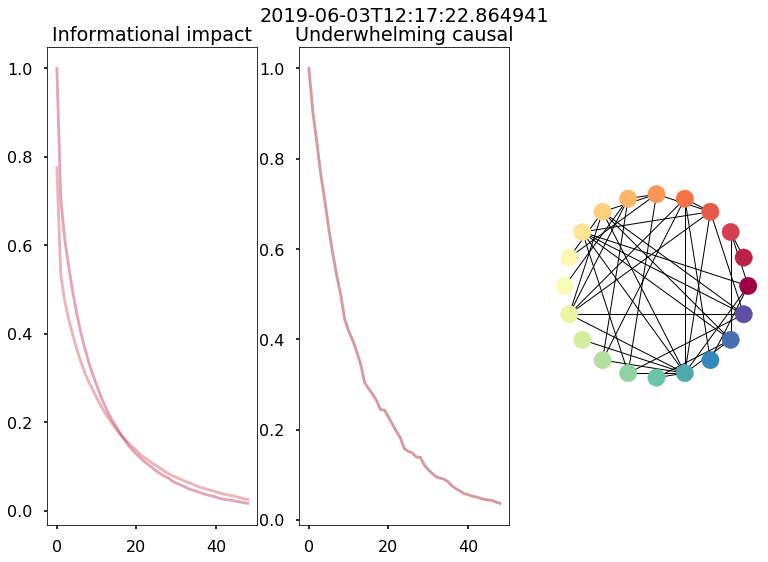

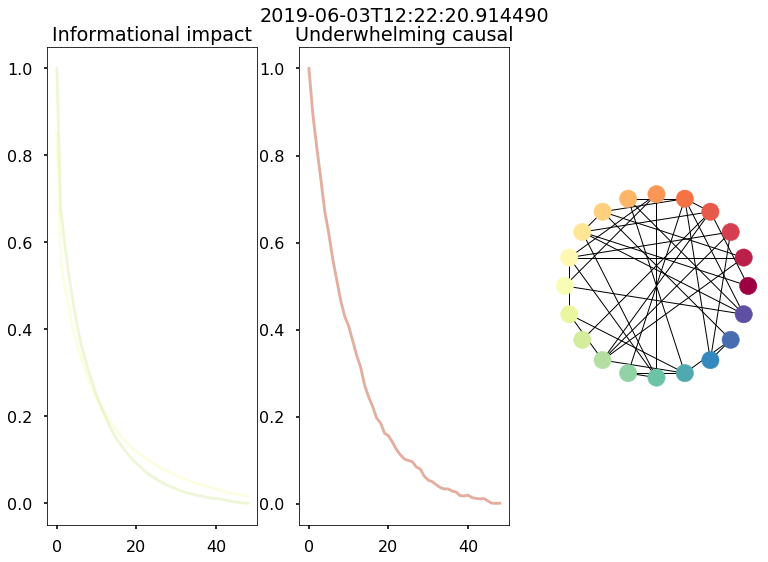

In [7]:
perc = np.zeros((len(aucs), 2))

# fig, ax = plt.subplots(3, 1, figsize = (10, 16))
colors = plt.cm.gist_ncar(np.linspace(0, 1, len(aucs)))

labels = "Informational impact\tUnderwhelming causal".split('\t')
for idx, (k, v) in enumerate(aucs.items()):
    
    tmp = np.argsort(v.squeeze(), axis = -1)[:, -1]
    perc[idx] = tmp[[0]] == tmp[[1, 2]]
    if not perc[idx, 0]:
        d = loadedData[k].squeeze()
        gs = dict(\
                 width_ratios = [1, 1, 1]\
                 )
        fig, ax = plt.subplots(1,3, gridspec_kw = gs)
        
        mainax = fig.add_subplot(111, \
                 frameon = 0, xticks = [], yticks = [])
        mainax.set_title(k, pad = 25)
        colors = plt.cm.Spectral(np.linspace(0, 1, settings[k].nNodes))
        g = settings[k].graph
        g = nx.node_link_graph(g)
        pos    = nx.circular_layout(g)
        subset = np.argsort(v.squeeze(), -1)[:, -2:]
        print(subset)
        for kk, axi in enumerate(ax[:2]):
            sub = subset[kk]
            [axi.plot(i, color = c, alpha = .4) for i, c in zip(d[kk, sub], colors[sub])]
            axi.set_title(labels[kk])
        nx.draw_networkx_nodes(g, pos = pos, node_color = colors, ax = ax[-1])
        nx.draw_networkx_edges(g, pos = pos, ax = ax[-1])
        ax[-1].set_aspect('equal', 'box')
        ax[-1].axes.axis('off')
        
            
        
#     vv = loadedData[k]
#     for jdx, label in enumerate(tmp):
#         axi = ax[jdx]
#         d = loadedData[k].squeeze()
#         print(d.shape)
#         axi.scatter(*d[[0, jdx + 1], label, :])
#         axi.plot(vv.squeeze()[jdx, label, :])
        
    
print(perc.mean(0), perc.std(0))


In [ ]:
fig, ax = plt.subplots()
for k, v in aucs.items():
    ax.scatter(*v[[0,1]].squeeze())
fig.savefig('test.png')